In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('mall customers.csv')#Read CSV file from system

In [3]:
df.head()#See CSV file

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data=df.copy()#copy csv file in data variable

In [5]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)#Rename the column name

In [6]:
df.head()#after rename see the dataframe

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape#Seeing shape

(200, 5)

In [8]:
df.nunique()#seeing unique value

CustomerID    200
Gender          2
Age            51
Income         64
Score          84
dtype: int64

In [9]:
df.isnull().sum()#sum of null value

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [10]:
df.dtypes#Seeing the datatype of dataframe

CustomerID     int64
Gender        object
Age            int64
Income         int64
Score          int64
dtype: object

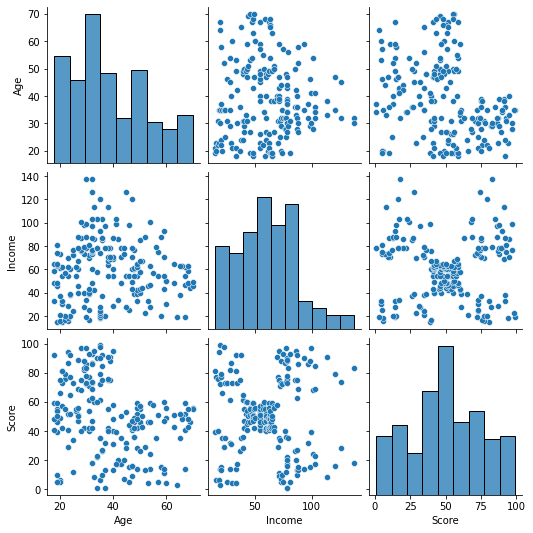

In [11]:
sns.pairplot(df[['Age','Income','Score']])

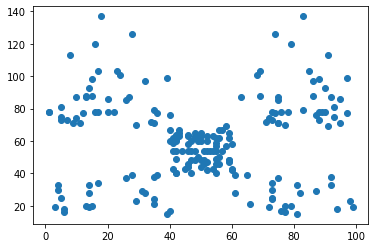

In [12]:
plt.scatter(df.Score,df.Income)

# KMeans Cluster

In [13]:
from sklearn.cluster import KMeans

In [14]:
km=KMeans()

In [15]:
predict_value=km.fit_predict(df[['Score','Income']])

In [16]:
predict_value

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 7, 4, 0, 4, 0, 4,
       7, 4, 0, 4, 0, 4, 0, 4, 0, 4, 7, 4, 0, 4, 7, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 7, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2])

In [17]:
df['cluster_value']=predict_value

In [18]:
df.head()

,CustomerID,Gender,Age,Income,Score,cluster_value
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


In [19]:
center=km.cluster_centers_

In [20]:
center

array([[ 12.68181818,  80.18181818],
       [ 50.82978723,  47.72340426],
       [ 82.72727273, 108.18181818],
       [ 80.04761905,  25.0952381 ],
       [ 81.89285714,  78.03571429],
       [ 19.52380952,  25.14285714],
       [ 22.        , 109.7       ],
       [ 46.45      ,  64.45      ]])

In [21]:
df0=df[df['cluster_value']==0]
df1=df[df['cluster_value']==1]
df2=df[df['cluster_value']==2]
df3=df[df['cluster_value']==3]
df4=df[df['cluster_value']==4]
df5=df[df['cluster_value']==5]
df6=df[df['cluster_value']==6]
df7=df[df['cluster_value']==7]


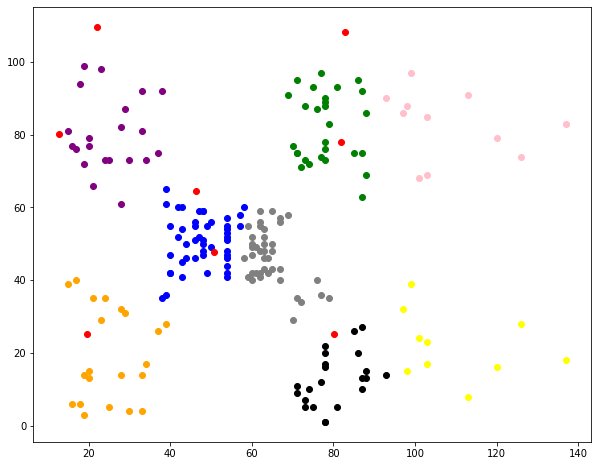

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(df0['Income'],df0['Score'],color='black',label='cluster0')
plt.scatter(df1['Income'],df1['Score'],color='blue',label='cluster1')
plt.scatter(df2['Income'],df2['Score'],color='pink',label='cluster2')
plt.scatter(df3['Income'],df3['Score'],color='purple',label='cluster3')
plt.scatter(df4['Income'],df4['Score'],color='green',label='cluster4')
plt.scatter(df5['Income'],df5['Score'],color='orange',label='cluster5')
plt.scatter(df6['Income'],df6['Score'],color='Yellow',label='cluster6')
plt.scatter(df7['Income'],df7['Score'],color='Gray',label='cluster7')

plt.scatter(center[:,0],center[:,1],color='red',label='centroid')

# Optimization with WCSS

In [27]:
from sklearn.cluster import KMeans
wcss=[]
cluster=range(1,20)
for c in cluster:
    km2=KMeans(n_clusters=c)
    km2.fit(df[['Income','Score']])
    wcss.append(km2.inertia_)

In [28]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37455.98455516028,
 30241.34361793659,
 25028.020475269397,
 21829.135638779822,
 19710.030271660795,
 18163.319061032347,
 15955.00139895947,
 14292.543823365135,
 12775.343451156687,
 12086.069141384933,
 11005.28075004705,
 9894.204558676614,
 9389.221755437546,
 8492.778402643109]

In [29]:
cluster

range(1, 20)

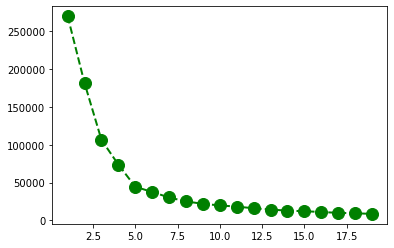

In [31]:
plt.plot(cluster,wcss,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)

In [35]:
!pip install kneed

In [36]:
from kneed import KneeLocator

In [49]:
kn=KneeLocator(cluster,wcss,curve='convex',direction='decreasing')

In [50]:
kn.knee

5

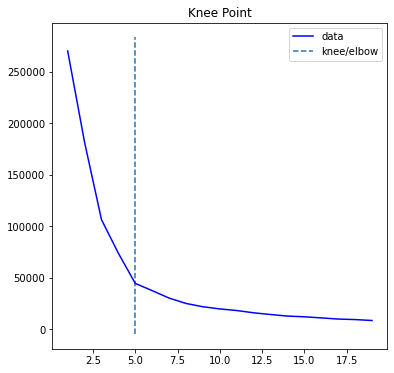

In [51]:
kn.plot_knee()

# After finding K value

In [52]:
km3=KMeans(n_clusters=5)

In [53]:
predict_value=km3.fit_predict(df[['Score','Income']])

In [54]:
predict_value

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [55]:
df['cluster_value']=predict_value

In [56]:
center=km3.cluster_centers_

In [57]:
center

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [58]:
df0=df[df['cluster_value']==0]
df1=df[df['cluster_value']==1]
df2=df[df['cluster_value']==2]
df3=df[df['cluster_value']==3]
df4=df[df['cluster_value']==4]

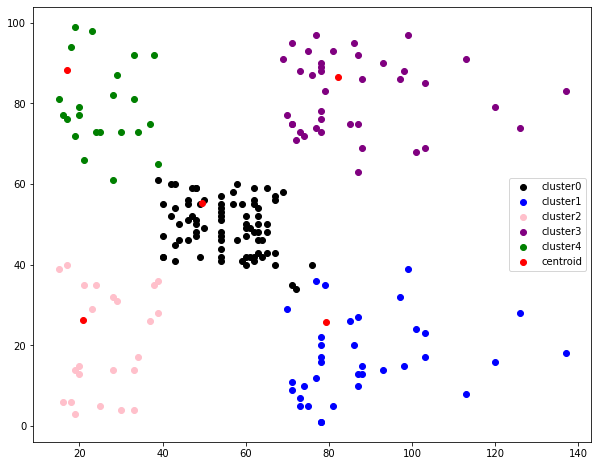

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(df0['Income'],df0['Score'],color='black',label='cluster0')
plt.scatter(df1['Income'],df1['Score'],color='blue',label='cluster1')
plt.scatter(df2['Income'],df2['Score'],color='pink',label='cluster2')
plt.scatter(df3['Income'],df3['Score'],color='purple',label='cluster3')
plt.scatter(df4['Income'],df4['Score'],color='green',label='cluster4')
plt.scatter(center[:,0],center[:,1],color='red',label='centroid')
plt.legend()